In [1]:
from keras.models import Sequential
from keras import backend as k
from tensorflow.keras import backend as k



Using TensorFlow backend.


In [2]:
from keras.layers import Dense

In [3]:
import tensorflow as tf
layers = tf.keras.layers
import numpy as np
print(tf.__version__)


2.1.0


# Read the data set


In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("download-10.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop the columns which are unique for all users like IDs (2.5 points)


In [6]:
df=df.drop('RowNumber',axis=1)

In [7]:
df=df.drop('CustomerId',axis=1)

In [8]:
df=df.drop('Surname',axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
pd.isnull(df).count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df1=pd.get_dummies(df,drop_first=True)

In [15]:
df1.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [19]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [16]:
import seaborn as sns

LinAlgError: singular matrix

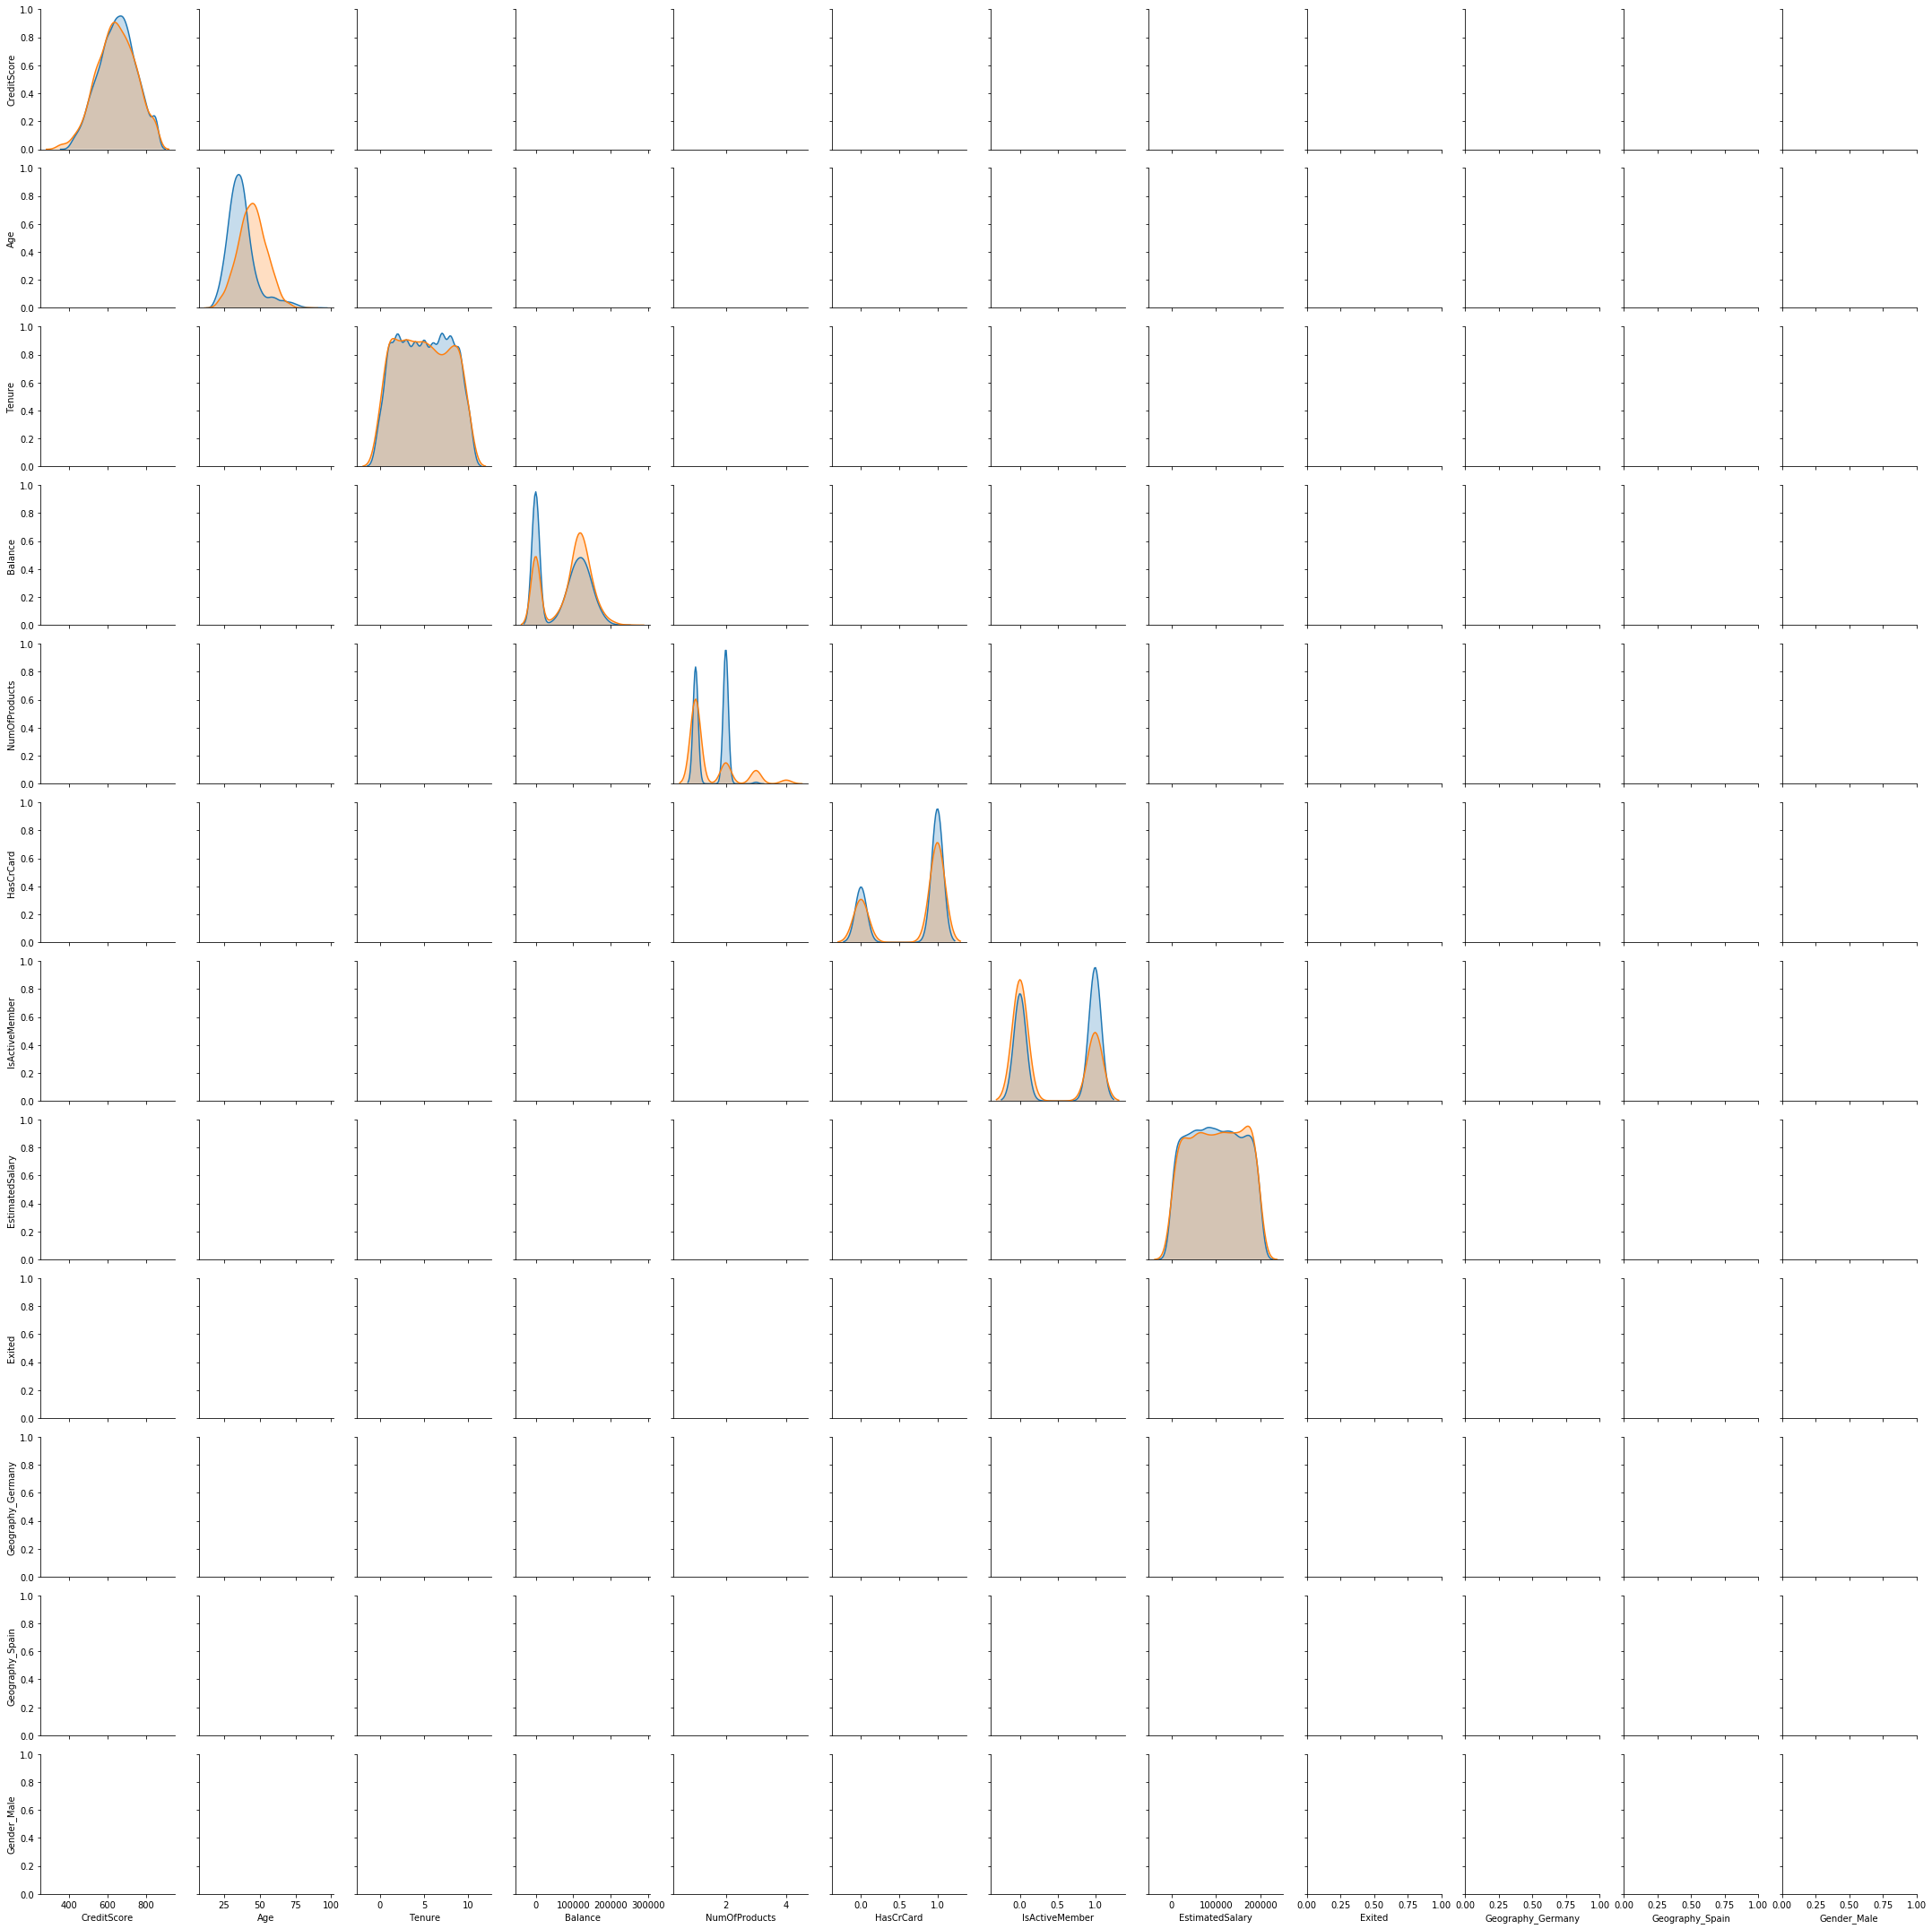

In [49]:
sns.pairplot(data=df1, hue='Exited')

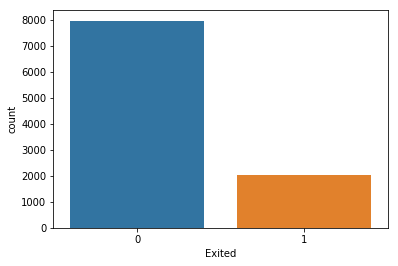

In [17]:
sns.countplot(df1['Exited'])

In [18]:
df1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

# Distinguish the feature and target set (2.5 points)


In [19]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']


# Divide the data set into training and test sets (

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

# Normalize the train and test data (5 points)


In [23]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


# Initialize & build the model (10 points)


In [47]:
# First we will use SMOTE to oversample, since this is an imbalanced data set

In [26]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


After OverSampling, the shape of train_X: (11190, 11)
After OverSampling, the shape of train_y: (11190,) 

After OverSampling, counts of label '1': 5595
After OverSampling, counts of label '0': 5595


In [27]:

# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

In [28]:
# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


# Predict the results using 0.5 as a threshold (5 points)
# Print the Accuracy score and confusion matrix (2.5 points)



In [30]:
model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train_res, y_train_res,epochs=20, batch_size=1, verbose=1)

Train on 11190 samples
Epoch 1/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7199 - accuracy: 0.7864
Epoch 2/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7175 - accuracy: 0.7881
Epoch 3/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7148 - accuracy: 0.7904s - loss: 0.7152 - ac
Epoch 4/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7129 - accuracy: 0.7919
Epoch 5/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7110 - accuracy: 0.7934
Epoch 6/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7095 - accuracy: 0.7937
Epoch 7/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7076 - accuracy: 0.7971
Epoch 8/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7065 - accuracy: 0.7981
Epoch 9/20
11190/11190 [==============================] - 16s 1ms/sample - loss: 0.7039 - accuracy: 

In [31]:
y_pred = np.round(model.predict(X_test))
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

3000/3000 [==============================] - 0s 61us/sample - loss: 1.0245 - accuracy: 0.7660
[1.0244856866200764, 0.766]


In [32]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred,labels=[0 ,1])
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

        pred:0  pred:1
true:0    1835     533
true:1     169     463


In [40]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_test, y_pred, average='macro'))
print(precision_score(y_test,y_pred, average='macro'))

0.7537552386247006
0.6902640502128274


In [41]:
model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.9725 - accuracy: 0.8293
Epoch 2/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.9589 - accuracy: 0.8416
Epoch 3/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9528 - accuracy: 0.8480
Epoch 4/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9514 - accuracy: 0.8487
Epoch 5/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9478 - accuracy: 0.8529
Epoch 6/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9461 - accuracy: 0.8537
Epoch 7/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9438 - accuracy: 0.8571
Epoch 8/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.9422 - accuracy: 0.8594
Epoch 9/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.9416 - accuracy: 0.8596
Epoch 10/10
7000/7000 [==========

In [42]:
y_pred = np.round(model.predict(X_test))

In [43]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

3000/3000 [==============================] - 0s 64us/sample - loss: 0.9368 - accuracy: 0.8537
[0.9367821710904439, 0.85366666]


In [44]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred,labels=[0 ,1])
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

        pred:0  pred:1
true:0    2262     106
true:1     333     299


In [45]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_test, y_pred, average='macro'))
print(precision_score(y_test,y_pred, average='macro'))

0.7141688761546356
0.8049739527581532


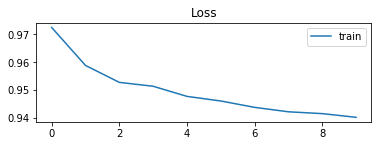

In [46]:
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)


Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.9792 - accuracy: 0.8574
Epoch 2/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.4362 - accuracy: 0.8523
Epoch 3/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.3590 - accuracy: 0.8569
Epoch 4/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.3507 - accuracy: 0.8597
Epoch 5/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.3450 - accuracy: 0.8593
Epoch 6/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.3407 - accuracy: 0.8629
Epoch 7/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.3387 - accuracy: 0.8636
Epoch 8/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 0.3366 - accuracy: 0.8641
Epoch 9/10
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.3348 - accuracy: 0.8640
Epoch 10/10
7000/7000 [==========

In [49]:
y_pred = np.round(model.predict(X_test))
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

3000/3000 [==============================] - 0s 65us/sample - loss: 0.3451 - accuracy: 0.8580
[0.34513747215270996, 0.858]


In [50]:
from sklearn import metrics
#metrics.confusion_matrix(y_test,y_pred,labels=[0 ,1])
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

        pred:0  pred:1
true:0    2291      77
true:1     349     283


In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_test, y_pred, average='macro'))
print(precision_score(y_test,y_pred, average='macro'))

0.7076339591173452
0.8269570707070707


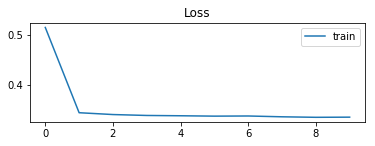

In [109]:
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

# Conclusion

In [ ]:
# model with loss = hinge gives  accuracy: 0.8617 
- precision: 0.80; recall: 0.71
        
# model with loss='binary_crossentropy' gives accuracy : 0.8580
- precision: 0.82; recall: 0.70

# model with loss =hinge after using SMOTE to balance the dataset gives accuracy: 0.76
- precision:0.69  ; recall: 0.75
        
Balancing the dataset using SMOTE gives lower accuracy but good recall. This might be very important since we
are trying to predict Churn- we wish to reduce false negatives(misses)
